# **A/B testing analysis**

## Describing project

In this project I will analyze A/B testing results for the marketing department of an online store. 

The data is compiled from:
- Hypotheses on boosting the online store's revenue and their properties.
- The visits made during the A/B testing period.
- The orders made during the A/B testing period.

The main goal is to optimize the marketing expenses by concluding if one of the test groups is leading in conversion rate and order size.

The main steps will be:
- Loading the data while optimizing the data types.
- Exploring the data to learn its contents and to identify issues with its quality that should be addressed.
- Preparing the data for analysis by treating the discovered issues.
- Prioritizing the hypotheses.
- Analyzing the results of the A/B test.
- Summarizing the findings and producing business decisions.

# Importing modules

In [ ]:
# Importing the required modules
import pandas as pd # For general data analysis tools
import numpy as np # For mathematical tools, especially arrays
import scipy.stats as stats # For statistical tools
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
import datetime as dt # For date and time tools

# Loading & exploring data

## Loading data

In [ ]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - A local runtime.
# 2 - A hosted runtime on Yandex Jupyterhub.
# 3 - A hosted runtime on Google colaboratory.
runtime_type = 3

# To connect to a local runtime use the command:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# Setting file paths
file_path_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Notebooks - Yandex Practicum/'
file_path_yandex = '/datasets/'
file_path_google_colab = '/content/drive/My Drive/Colab Notebooks/Notebooks - Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    file_path = file_path_local

elif runtime_type == 2:
    print('A hosted runtime on Yandex Jupyterhub was chosen.\n')
    file_path = file_path_yandex
    
elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    file_path = file_path_google_colab

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either 1, 2 or 3.')

A local runtime was chosen.



In [ ]:
# Loading the data
data_hypotheses = pd.read_csv(file_path + 'hypotheses_us.csv', sep=';')
data_visits = pd.read_csv(file_path + 'visits_us.csv')
data_orders = pd.read_csv(file_path + 'orders_us.csv')

In [ ]:
# Looking at the general information
print('Printing the general information for data_hypotheses:\n')
data_hypotheses.info(memory_usage='deep')
print()
print('Printing some of the first rows:\n')
display(data_hypotheses)
print()

print('Printing the general information for data_visits:\n')
data_visits.info(memory_usage='deep')
print()
print('Printing some of the first rows:\n')
display(data_visits.head(5))
print()

print('Printing the general information for data_orders:\n')
data_orders.info(memory_usage='deep')
print()
print('Printing some of the first rows:\n')
display(data_orders.head(5))
print()

Printing the general information for data_hypotheses:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB

Printing some of the first rows:



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5



Printing the general information for data_visits:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB

Printing some of the first rows:



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Printing the general information for data_orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB

Printing some of the first rows:



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


## Exploring data

### Hypotheses

In [ ]:
# Exploring the data_hypotheses dataframe
data_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
# Exploring the "Hypotheses" column
print('Exploring the "Hypothesis" column.\n')
print(data_hypotheses['Hypothesis'])

Exploring the "Hypothesis" column.

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object


Exploring the "Reach" column.



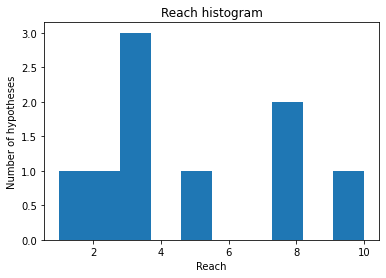

In [ ]:
# Exploring the "Reach" column
print('Exploring the "Reach" column.\n')

data_hypotheses['Reach'].plot(kind='hist', bins=10, title='Reach histogram')
plt.ylabel('Number of hypotheses')
plt.xlabel('Reach')
plt.show()

Exploring the "Impact" column.



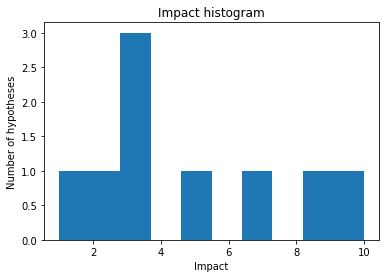

In [ ]:
# Exploring the "Impact" column
print('Exploring the "Impact" column.\n')

data_hypotheses['Impact'].plot(kind='hist', bins=10, title='Impact histogram')
plt.ylabel('Number of hypotheses')
plt.xlabel('Impact')
plt.show()

Exploring the "Confidence" column.



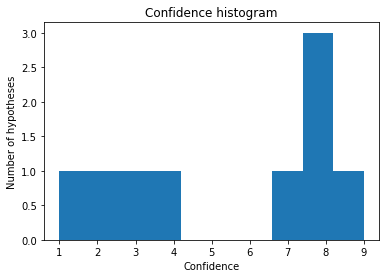

In [ ]:
# Exploring the "Confidence" column
print('Exploring the "Confidence" column.\n')

data_hypotheses['Confidence'].plot(kind='hist', bins=10, title='Confidence histogram')
plt.ylabel('Number of hypotheses')
plt.xlabel('Confidence')
plt.show()

Exploring the "Effort" column.



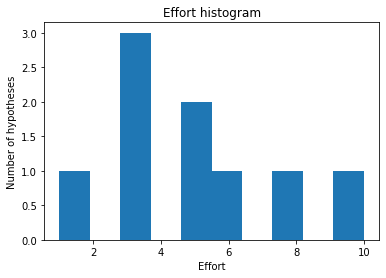

In [ ]:
# Exploring the "Effort" column
print('Exploring the "Effort" column.\n')

data_hypotheses['Effort'].plot(kind='hist', bins=10, title='Effort histogram')
plt.ylabel('Number of hypotheses')
plt.xlabel('Effort')
plt.show()

The number of hypotheses with low and high parameters aren't overwhelmingly different from each other.

### Visits

In [ ]:
# Exploring the data_visits dataframe
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# Exploring the "date" column
print('Exploring the "date" column.\n')

data_visits['date'].astype('datetime64').describe()

Exploring the "date" column.



<ipython-input-12-af949e906b3a>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_visits['date'].astype('datetime64').describe()


count                      62
unique                     31
top       2019-08-01 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

The A/B test was performed during one whole month.

Exploring the "group" column.

Number of records per group:
 A    31
B    31
Name: group, dtype: int64 



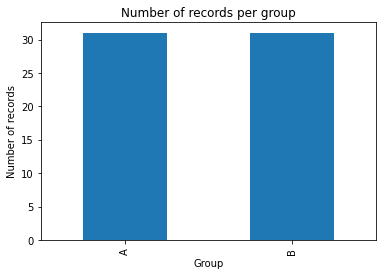

In [ ]:
# Exploring the "group" column
print('Exploring the "group" column.\n')

print('Number of records per group:\n', data_visits['group'].value_counts(), '\n')

data_visits['group'].value_counts().plot(kind='bar', title='Number of records per group')
plt.ylabel('Number of records')
plt.xlabel('Group')
plt.show()

The numbers of records per group are equal.

Exploring the "visits" column.

The number of visits per group are:

group
A    18736
B    18916
Name: visits, dtype: int64 



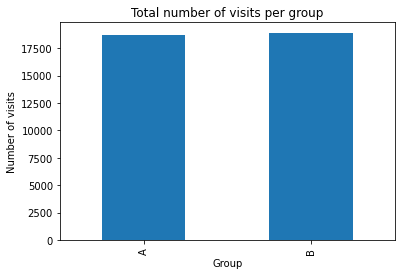

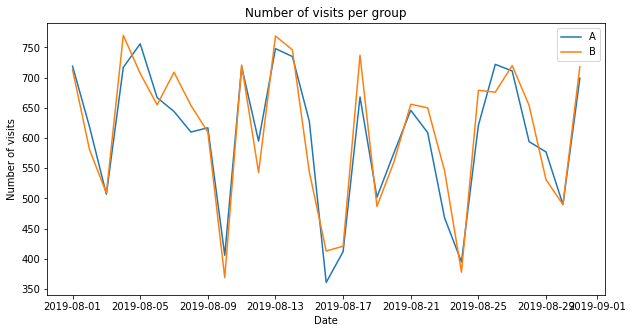

In [ ]:
# Exploring the "visits" column
print('Exploring the "visits" column.\n')
print('The number of visits per group are:\n')
visits_per_group = data_visits.groupby('group')['visits'].sum()
print(visits_per_group, '\n')

visits_per_group.plot(kind='bar', title='Total number of visits per group')
plt.ylabel('Number of visits')
plt.xlabel('Group')
plt.show()
print()

# Plotting visits per group per day
visits_a = data_visits.query('group == "A"').copy(deep=True)
visits_a['visit_day'] = visits_a['date'].astype('datetime64[D]')
visits_a_per_day = visits_a.groupby('visit_day', as_index=False).agg({'visits': 'sum'})

visits_b = data_visits.query('group == "B"').copy(deep=True)
visits_b['visit_day'] = visits_b['date'].astype('datetime64[D]')
visits_b_per_day = visits_b.groupby('visit_day', as_index=False).agg({'visits': 'sum'})

fig = plt.figure(figsize=(10, 5))
plt.plot(visits_a_per_day['visit_day'], visits_a_per_day['visits'], label='A')
plt.plot(visits_b_per_day['visit_day'], visits_b_per_day['visits'], label='B')
plt.title('Number of visits per group')
plt.ylabel('Number of visits')
plt.xlabel('Date')
plt.legend()
plt.show()

There's a slight difference between the total number of visits per group, but the general behaviors are similar, where dips and peaks in visits occur approximately around the same times.

### Orders

In [ ]:
# Exploring the data_orders dataframe
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Exploring the "transactionId" column.

The number of orders is: 1197

The numbers of orders per group are:

group
A    557
B    640
Name: transactionId, dtype: int64 



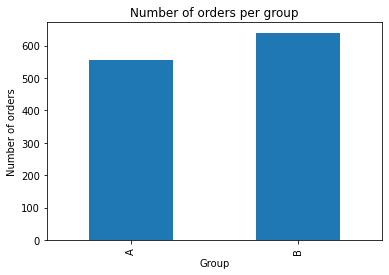

In [ ]:
# Exploring the "transactionId" column
print('Exploring the "transactionId" column.\n')
print(f'The number of orders is: {len(data_orders)}\n')

print('The numbers of orders per group are:\n')
orders_per_group = data_orders.groupby('group')['transactionId'].count()
print(orders_per_group, '\n')

orders_per_group.plot(kind='bar', title='Number of orders per group')
plt.ylabel('Number of orders')
plt.xlabel('Group')
plt.show()

Group B leads in the total number of orders.

Exploring the "visitorId" column.

The number of unique customer: 1031 

The number of groups per customer are:

1    973
2     58
Name: group, dtype: int64 



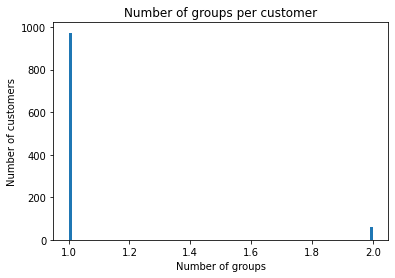

In [ ]:
# Exploring the "visitorId" column
print('Exploring the "visitorId" column.\n')
print('The number of unique customer: {} \n'.format(data_orders['visitorId'].nunique()))

print('The number of groups per customer are:\n')
groups_per_customer = data_orders.groupby('visitorId')['group'].nunique()
print(groups_per_customer.value_counts(), '\n')

groups_per_customer.plot(kind='hist', bins=100, title='Number of groups per customer')
plt.ylabel('Number of customers')
plt.xlabel('Number of groups')
plt.show()

About 5% of the customers were assigned to both groups.

In [ ]:
# Exploring the "date" column
print('Exploring the "date" column.\n')

data_orders['date'].astype('datetime64').describe()

Exploring the "date" column.



<ipython-input-18-510fac75d899>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_orders['date'].astype('datetime64').describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Exploring the "revenue" column.

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64 



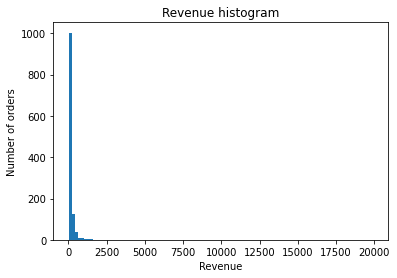

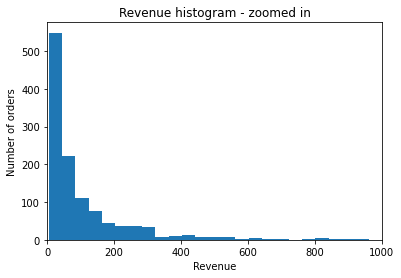

In [ ]:
# Exploring the "revenue" column
print('Exploring the "revenue" column.\n')
print(data_orders['revenue'].describe(), '\n')

data_orders['revenue'].plot(kind='hist', bins=100, title='Revenue histogram')
plt.ylabel('Number of orders')
plt.xlabel('Revenue')
plt.show()

data_orders['revenue'].plot(kind='hist', bins=500, title='Revenue histogram - zoomed in')
plt.ylabel('Number of orders')
plt.xlabel('Revenue')
plt.xlim(0,1000)
plt.show()

The distribution of the orders revenues is peaked at the minimal revenue, with a very large number of low revenue orders. High revenue orders are uncommon, but the few that are high are extremely high, reaching tens of thousands of USDs. This is expressed in the distribution being very positively-skewed.

Exploring the "group" column.

The numbers of orders per group are:

B    640
A    557
Name: group, dtype: int64 



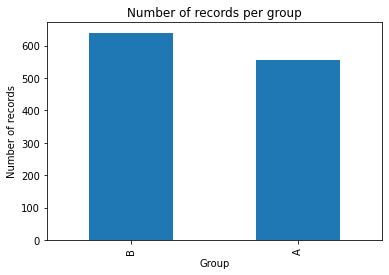

In [ ]:
# Exploring the "group" column
print('Exploring the "group" column.\n')

print('The numbers of orders per group are:\n')
print(data_orders['group'].value_counts(), '\n')

data_orders['group'].value_counts().plot(kind='bar', title='Number of records per group')
plt.ylabel('Number of records')
plt.xlabel('Group')
plt.show()

Group B leads in the total number of orders.

## Conclusions

- The number of hypotheses with low and high parameters aren't overwhelmingly different from each other.

---

- The data type of the "date" column should be converted to datetime.

- The A/B test was performed during one whole month.

- The numbers of records per group are equal.

- There's a slight difference between the total number of visits per group, but the general behaviors are similar, where dips and peaks in visits occur approximately around the same times.

---

- About 5% of the customers were assigned to both groups.

- Group B leads in the total number of orders.

- Some customers were assigned to both groups.

- The distribution of the orders revenues is peaked at the minimal revenue, with a very large number of low revenue orders. High revenue orders are uncommon, but the few that are high are extremely high, reaching tens of thousands of USDs. This is expressed in the distribution being very positively-skewed.

# Preparing data

## Treating incorrect data

In [ ]:
# Treating incorrect data
# Finding the users who were placed into both groups
groups_per_customer = data_orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
incorrect_customers = groups_per_customer.query('group == 2')['visitorId'].values

# Removing these users
data_orders_original = data_orders.copy(deep=True) # Saving original dataframe
data_orders = data_orders.query('visitorId not in @incorrect_customers')

print('Number of records before removing incorrect data:\n', len(data_orders_original), '\n')
print('Number of records after removing incorrect data:\n', len(data_orders), '\n')

Number of records before removing incorrect data:
 1197 

Number of records after removing incorrect data:
 1016 



## Treating duplicates

In [ ]:
# Looking for duplicated rows
print('The total number of duplicated rows in data_hypotheses is {}.\n'
    .format(data_hypotheses.duplicated().sum()))
print()

print('The total number of duplicated rows in data_visits is {}.\n'
    .format(data_visits.duplicated().sum()))
print()

print('The total number of duplicated rows in data_orders is {}.\n'
    .format(data_orders.duplicated().sum()))

The total number of duplicated rows in data_hypotheses is 0.


The total number of duplicated rows in data_visits is 0.


The total number of duplicated rows in data_orders is 0.



## Treating missing values

In [ ]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column in data_hypotheses are:\n')
print(100 * data_hypotheses.isna().sum() / len(data_hypotheses))
print()

print('The percentages of missing values per column in data_visits are:\n')
print(100 * data_visits.isna().sum() / len(data_visits))
print()

print('The percentages of missing values per column in data_orders are:\n')
print(100 * data_orders.isna().sum() / len(data_orders))

The percentages of missing values per column in data_hypotheses are:

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Effort        0.0
dtype: float64

The percentages of missing values per column in data_visits are:

date      0.0
group     0.0
visits    0.0
dtype: float64

The percentages of missing values per column in data_orders are:

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


## Treating data types

In [ ]:
# Finding the format of the dates
print(data_visits['date'].head(5))
print()
print(data_orders['date'].head(5))

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
Name: date, dtype: object

0    2019-08-15
1    2019-08-15
3    2019-08-15
4    2019-08-15
5    2019-08-15
Name: date, dtype: object


In [ ]:
# Converting the data type of dates to "datetime"
date_format = '%Y-%m-%d'
data_visits['date'] = pd.to_datetime(data_visits['date'], format=date_format)
data_orders['date'] = pd.to_datetime(data_orders['date'], format=date_format)

In [ ]:
# Presenting the data types of the different variables
print('The data types in data_hypotheses are:\n')
data_hypotheses.info()
print()

print('The data types in data_visits are:\n')
data_visits.info()
print()

print('The data types in data_orders are:\n')
data_orders.info()

The data types in data_hypotheses are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

The data types in data_visits are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

The data types in data_orders are:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entri

## Conclusions

- The records with visitors who were assigned to both groups were removed (about 5% of the data).
- The data didn't contain duplicated rows.
- The data didn't contain missing values.
- The data type of the "date" columns in data_visits and data_orders were converted to datetime.

# Prioritizing hypotheses

## ICE framework

Applying the ICE framework to prioritize hypotheses. Then sorting them in descending order of priority.

In [ ]:
# Prioritizing hypotheses using the ICE framework
data_hypotheses['ICE'] = \
    data_hypotheses['Impact'] * data_hypotheses['Confidence'] / data_hypotheses['Effort']
print(data_hypotheses.sort_values('ICE', ascending=False)[['Hypothesis', 'ICE']])

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


## RICE framework

Applying the RICE framework to prioritize hypotheses. Then sorting them in descending order of priority.

In [ ]:
# Prioritizing hypotheses using the RICE framework
data_hypotheses['RICE'] = data_hypotheses['Reach'] * data_hypotheses['Impact'] \
    * data_hypotheses['Confidence'] / data_hypotheses['Effort']
print(data_hypotheses.sort_values('RICE', ascending=False)[['Hypothesis', 'RICE']])

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


## Comparing frameworks

Showing how the prioritization of hypotheses changes when using RICE instead of ICE and explaining the changes.

In [ ]:
# Looking at the reach of the hypotheses
data_hypotheses[['Hypothesis','Reach']].sort_values('Reach', ascending=False)

,Hypothesis,Reach
7,Add a subscription form to all the main pages....,10
2,Add product recommendation blocks to the store...,8
3,Change the category structure. This will incre...,8
6,Show banners with current offers and sales on ...,5
0,Add two new channels for attracting traffic. T...,3
4,Change the background color on the main page. ...,3
5,Add a customer review page. This will increase...,3
1,Launch your own delivery service. This will sh...,2
8,Launch a promotion that gives users discounts ...,1


- When using the ICE framework we saw that the order of priorities for the top 5 hypotheses is 8, 0, 7, 6 & 2.
- In the RICE framework the order of priorities for the top 5 hypotheses is 7, 2, 0, 6 & 8.
- We see that the same hypotheses are still at the top 5, but their order completely changed.
- The order changed due to the effect range has on the priority value - the value is linearly scaled by it. Therefore, the priority value of a hypothesis that has a reach of 10 for example, such as hypothesis 7, will be directly multiplied by 10. If the value was low to begin with, scaling by a large reach won't be enough to raise the priority though.

# Calculating variables

In [ ]:
# Creating an array with unique pairs of dates and groups
datesGroups = data_orders[['date','group']].drop_duplicates()

# Calculating aggregated cumulative data on visitors
# We first find rows with desired dates and groups, then aggregate their values and then sort
visitorsAggregated = datesGroups.apply(lambda x: data_visits[np.logical_and(data_visits['date'] <= x['date'],
                                                                         data_visits['group'] == x['group'])] \
                                .agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1) \
                                .sort_values(by=['date','group'])

# Calculating aggregated cumulative data on orders 
ordersAggregated = datesGroups.apply(lambda x: data_orders[np.logical_and(data_orders['date'] <= x['date'],
                                                                     data_orders['group'] == x['group'])] \
                              .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
                                    'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1) \
                              .sort_values(by=['date','group'])

# Merging the two tables renaming the columns
cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

# Presenting results
print('cumulativeData dataframe:\n', cumulativeData.head(10))

cumulativeData dataframe:
         date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845
5 2019-08-03     B      54      53   4606.9    1803
6 2019-08-04     A      77      71   6225.6    2562
7 2019-08-04     B      68      66   6138.5    2573
8 2019-08-05     A      99      92   7623.6    3318
9 2019-08-05     B      89      87   7587.8    3280


# Analyzing A/B test

## 1) Cumulative revenue

Plotting cumulative revenue by group. Making conclusions and conjectures.

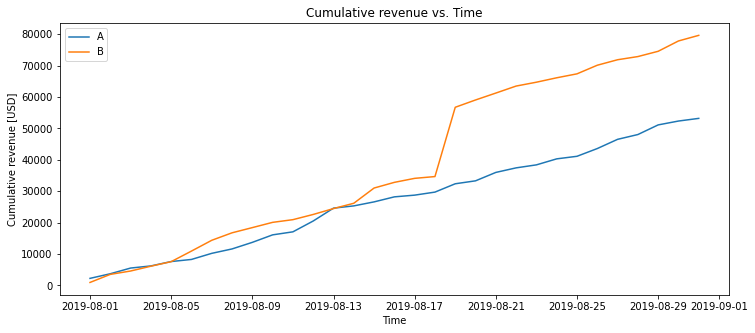

In [ ]:
# Dataframe with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# Dataframe with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# Plotting the group A revenue graph 
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative revenue vs. Time')
plt.ylabel('Cumulative revenue [USD]')
plt.xlabel('Time')
plt.legend()
plt.show()

The cumulative revenue of both groups is increasing steadily through time, where the revenue of group B is usually higher than that of group A. After about 18 days the difference between the revenues increases significantly, where a large jump occurs in the revenue of group B. This general behavior is good since it implies profits are made regardless of the group. The mentioned jump is suspicious though, and might have originated from outliers instead of the difference in the test conditions. At the moment it would seem that group B had the winning test conditions.

## 2) Cumulative average order size

Plotting cumulative average order size by group. Making conclusions and conjectures.

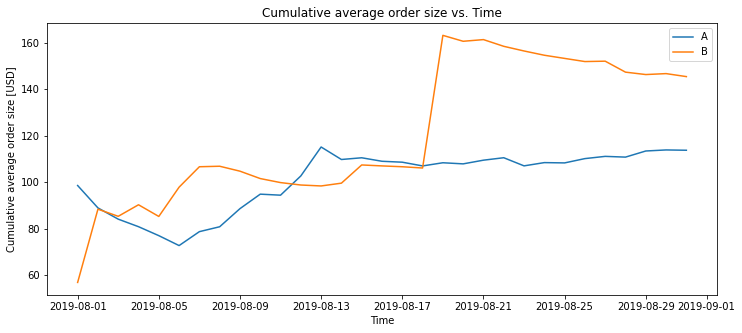

In [ ]:
# Calculating cumulative average order size by dividing cumulative revenue by
# cumulative number of orders
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Cumulative average order size vs. Time')
plt.ylabel('Cumulative average order size [USD]')
plt.xlabel('Time')
plt.legend()
plt.show()

The cumulative average order size of both groups is increased by the end of the test relative to its beginning, where the revenue of group B is higher than that of group A. Group A starts with an decrease but after about a week has an increase and slowly stabilizes, while group B starts with an increase and drops off a little at the end of the test. After about 18 days the difference between the order sizes increases significantly, where a large jump occurs in the revenue of group B. This general behavior is good since it implies profits are made regardless of the group. The mentioned jump is suspicious though, and might have originated from outliers instead of the difference in the test conditions. At the moment it would seem that group B had the winning test conditions.

## 3) Difference in cumulative average order size

Plotting the relative difference in cumulative average order size for group B compared with group A. Making conclusions and conjectures.

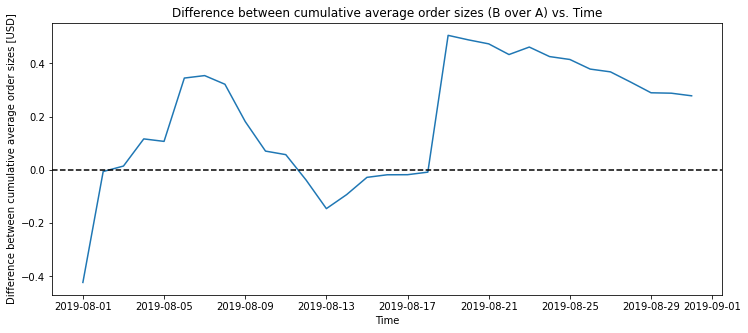

In [ ]:
# Plotting the relative difference between the cumulative average purchase sizes
# Merging the data into one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', right_on='date',
                                                   how='left', suffixes=['A', 'B'])

# Plotting
plt.figure(figsize=(12, 5))

# The relative difference between x and y is (x-y)/y, which equals x/y-1
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) \
         / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)

# Adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Difference between cumulative average order sizes (B over A) vs. Time')
plt.ylabel('Difference between cumulative average order sizes [USD]')
plt.xlabel('Time')
plt.show()

The difference between the cumulative average order sizes of both groups is increased by the end of the test relative to its beginning, where the average order sizes of group B is higher than that of group A. The difference starts at a negative value and experiences a sharp increase into positive values, followed by a drop back to the negatives, and after about 18 days the difference increases significantly, then slowly decreases. The mentioned sharp jumps are suspicious, and might have originated from outliers instead of the difference in the test conditions. At the moment it would seem that group B had the winning test conditions.

## 4) Conversion rate

Calculating each group's conversion rate as the ratio of orders to the number of visits for each day. Plotting the daily conversion rates of the two groups and describing the difference. Drawing conclusions and making conjectures.

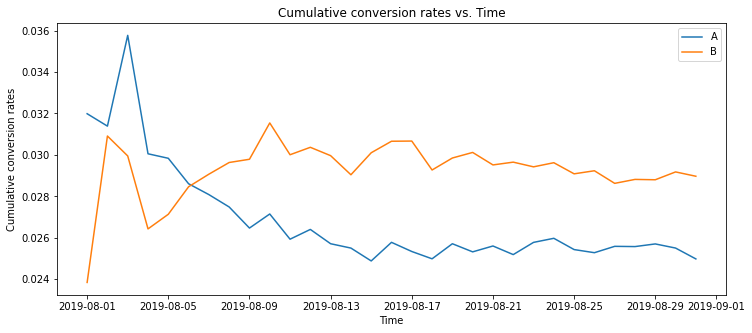

In [ ]:
# Calculating cumulative conversion rate
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visits']

# Selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative conversion rates vs. Time')
plt.ylabel('Cumulative conversion rates')
plt.xlabel('Time')
plt.legend()
plt.show()

The cumulative conversion rates started with group A having higher valeus than group B. The rates then experienced fluctuations during the first week of the test, but began to stabilize afterwards, with the rates of group B becoming higher than those of group A, and remaining this way. At the moment it would seem that group B had the winning test conditions.

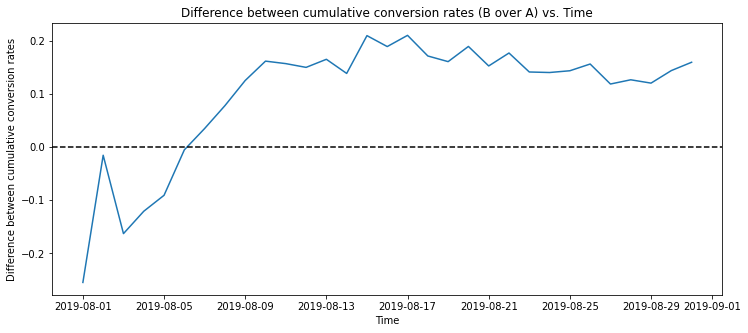

In [ ]:
# Calculating difference between cumulative conversion rates
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
                              .merge(cumulativeDataB[['date','conversion']],
                                     left_on='date', right_on='date',
                                     how='left', suffixes=['A', 'B'])

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Difference between cumulative conversion rates (B over A) vs. Time')
plt.ylabel('Difference between cumulative conversion rates')
plt.xlabel('Time')
plt.show()

The difference between cumulative conversion rates started with group A having higher rates than group B. The difference then experienced fluctuations during the first week of the test, but began to stabilize afterwards, with the rates of group B becoming higher than those of group A, and remaining this way.

## 5) Orders per user

Plotting a scatter chart of the number of orders per user. Making conclusions and conjectures.

In [ ]:
# Calculating orders per user
ordersByUsers = data_orders.drop(['group', 'revenue', 'date'], axis=1) \
                           .groupby('visitorId', as_index=False) \
                           .agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


The number of users per number of orders is:
 orders
1    937
2     29
3      7
Name: visitorId, dtype: int64 



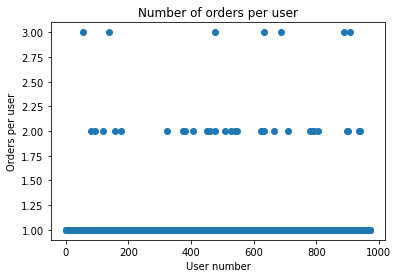

In [ ]:
# Plotting orders per user
x_values = pd.Series(range(0, len(ordersByUsers)))

print('The number of users per number of orders is:\n',
      ordersByUsers.groupby('orders')['visitorId'].count(), '\n')

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders per user')
plt.ylabel('Orders per user')
plt.xlabel('User number')
plt.show()

The majority of the users have only made a single order, a small portion made 2 orders, and an even smaller portion made 3 orders. No user made more than 3 orders, and it would be good to understand why, and ultimately cause this upper limit to increase. This can be dome for example by questioning the users or looking at the properties that are unique to the users who made 3 orders and attracting more of them. It is also possible that these are rare outliers that can't be easily caused to occur.

## 6) Orders per user percentiles

Calculating the 95th and 99th percentiles for the number of orders per user. Defining the point at which a data point becomes an anomaly.

In [ ]:
# Calculating the 95th and 99th percentiles of the orders per user
orders_percentiles = np.percentile(ordersByUsers['orders'], [95, 99])

print('The 95th and 99th percentiles of the orders per user are', orders_percentiles)

The 95th and 99th percentiles of the orders per user are [1. 2.]


We can define an outlier as a user with 2 or more orders, based on the calculated percentiles.

## 7) Order price

Plotting a scatter chart of order prices. Making conclusions and conjectures.

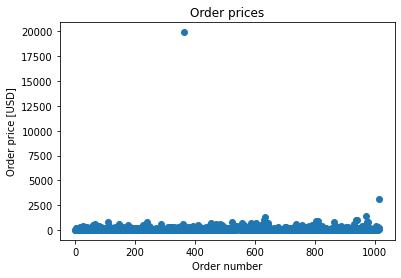

In [ ]:
# Plotting a scatter chart of order prices
x_values = pd.Series(range(0, len(data_orders['revenue'])))
plt.scatter(x_values, data_orders['revenue'])
plt.title('Order prices')
plt.ylabel('Order price [USD]')
plt.xlabel('Order number')
plt.show()

Almost all of the order prices are lower than a couple of thousand USDs, but some outliers exists, one of which is extremely high, and reaches around 20k USD.

## 8) Order prices percentiles

Calculating the 95th and 99th percentiles of order prices. Defining the point at which a data point becomes an anomaly.

In [ ]:
# Calculating the 95th and 99th percentiles of the order prices
prices_percentiles = np.percentile(data_orders['revenue'], [95, 99])

print('The 95th and 99th percentiles of the order prices are', prices_percentiles)

The 95th and 99th percentiles of the order prices are [414.275 830.3  ]


We can define an outlier as a user with an order size of more than 414 USD, based on the calculated percentiles.

## 9) Significance of conversion difference - raw data

Finding the statistical significance of the difference in conversion between the groups using the raw data. Making conclusions and conjectures.

In [ ]:
# Calculating the number of orders per user per group
ordersByUsersA = data_orders[data_orders['group']=='A'].groupby('visitorId', as_index=False) \
                                                       .agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = data_orders[data_orders['group']=='B'].groupby('visitorId', as_index=False) \
                                                       .agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# Adding the users with 0 orders per group to the previous series, by concatenating
# a series with 0s with a length that corresponds to the number of user with 0 orders
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,
                               index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum() \
                                               - len(ordersByUsersA['orders'])),
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0,
                               index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum() \
                                               - len(ordersByUsersB['orders'])),
                               name='orders')],
                    axis=0)

# Calculating statistical significance
print('The p-value is {0:.3f}.\n'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('The relative conversion gain for group B (group B conversion / group A conversion - 1) is {0:.3f}.'
      .format(sampleB.mean() / sampleA.mean() - 1))

The p-value is 0.006.

The relative conversion gain for group B (group B conversion / group A conversion - 1) is 0.160.


- The null hypothesis is that there isn't a statistically significant difference in conversion between groups A and B - the conversions are equal.

- The alternative hypothesis is that there is a statistically significant difference in conversion between groups A and B - the conversions are not equal.

- The significance level, alpha, is chosen to be 0.05.

- The p-value is smaller than 0.05, so we should reject the null hypothesis, and conclude that there is a statistically significant difference between groups A and B.

- We should still perform the statistical test on the filtered data without the outliers, to see if this result is a consequence of them.

## 10) Significance of order size difference - raw data

Finding the statistical significance of the difference in average order size between the groups using the raw data. Making conclusions and conjectures.

In [ ]:
# Calculating statistical significance
print('The p-value is {0:.3f}.\n'
      .format(stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'],
                                 data_orders[data_orders['group']=='B']['revenue'])[1]))

print('The relative difference in average order size between the groups is {0:.3f}.'
      .format(data_orders[data_orders['group']=='B']['revenue'].mean() \
              /data_orders[data_orders['group']=='A']['revenue'].mean() - 1))

The p-value is 0.431.

The relative difference in average order size between the groups is 0.278.


- The null hypothesis is that there isn't a statistically significant difference in the average order size between groups A and B - the order sizes are equal.

- The alternative hypothesis is that there is a statistically significant difference in the average order size between groups A and B - the average order sizes are not equal.

- The significance level, alpha, is chosen to be 0.05.

- The p-value is greater than 0.05, so we shouldn't reject the null hypothesis, and conclude that there isn't a statistically significant difference between groups A and B.

- We should still perform the statistical test on the filtered data without the outliers, to see if this result is a consequence of them.

## 11) Significance of conversion difference - filtered data

Finding the statistical significance of the difference in conversion between the groups using the filtered data. Making conclusions and conjectures.

In [ ]:
# Filtering anomalous users with many orders or with expensive orders
usersWithManyOrders = \
    pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= orders_percentiles[1]]['visitorId'],
               ordersByUsersB[ordersByUsersB['orders'] >= orders_percentiles[1]]['visitorId']],
              axis = 0)
usersWithExpensiveOrders = \
    data_orders[data_orders['revenue'] >= prices_percentiles[0]]['visitorId']

# Concatenating both types of anomalous users
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0) \
                          .drop_duplicates().sort_values()

print('First few records in abnormalUsers:\n', abnormalUsers.head(5), '\n')
print('Total number of users:\n', len(data_orders), '\n')
print('Number of anomalous users:\n', abnormalUsers.shape[0])

First few records in abnormalUsers:
 568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64 

Total number of users:
 1016 

Number of anomalous users:
 86


In [ ]:
# Calculating the statistical significance of the differences in conversion
# between the groups, using the filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'] \
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum() \
                                                       - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'] \
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum() \
                                                       - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

print('The p-value is {0:.3f}.\n'.format(stats.mannwhitneyu(sampleAFiltered,
                                                            sampleBFiltered)[1]))

print('The relative conversion gain for group B (group B conversion / group A conversion - 1) is {0:.3f}.'
      .format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

The p-value is 0.008.

The relative conversion gain for group B (group B conversion / group A conversion - 1) is 0.174.


- The null hypothesis is that there isn't a statistically significant difference in conversion between groups A and B - the conversions are equal.

- The alternative hypothesis is that there is a statistically significant difference in conversion between groups A and B - the conversions are not equal.

- The significance level, alpha, is chosen to be 0.05.

- The p-value is smaller than 0.05, so we should reject the null hypothesis, and conclude that there is a statistically significant difference between groups A and B.

- We see that removing the outliers didn't influence the results of the statistical test.

## 12) Significance of order size difference - filtered data

Finding the statistical significance of the difference in average order size between the groups using the filtered data. Making conclusions and conjectures.

In [ ]:
# Calculating the statistical significance of the difference in average order
# size between the groups, using the filtered data
print('The p-value is {0:.3f}.\n'
    .format(stats.mannwhitneyu(
        data_orders[np.logical_and(
            data_orders['group']=='A',
            np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
        data_orders[np.logical_and(
            data_orders['group']=='B',
            np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('The relative difference in average order size between the groups is {0:.3f}.'
    .format(
        data_orders[np.logical_and(data_orders['group']=='B',
                              np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
        data_orders[np.logical_and(
            data_orders['group']=='A',
            np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

The p-value is 0.386.

The relative difference in average order size between the groups is -0.033.


- The null hypothesis is that there isn't a statistically significant difference in the average order size between groups A and B - the order sizes are equal.

- The alternative hypothesis is that there is a statistically significant difference in the average order size between groups A and B - the average order sizes are not equal.

- The significance level, alpha, is chosen to be 0.05.

- The p-value is greater than 0.05, so we shouldn't reject the null hypothesis, and conclude that there isn't a statistically significant difference between groups A and B.

- We see that removing the outliers didn't influence the results of the statistical test.

## 13) Overall conclusion

The overall decision regrding the A/B test is that the test should be stopped, and group B should be considered the leader in the conversion rate metric. This decision is based on the following results:

- The conversion rate of group B was greater than that of group A at the end of the test.

- The difference between the cumulative conversion rates of the groups looks like it became very stable by the end of the test.

- There is a statistically significant difference between the cumulative conversion rates of the groups.

- The difference between the cumulative average order sizes of the groups looks like it's not about to flip its sign, although it slightly decreased in the last week of the test.

- There is no statistically significant difference between the cumulative average order sizes of the groups.

- When filtering out the anomalous users, the results of the statistical tests didn't change.